## Лабораторная работа №6. Глазков Олег Игоревич

### Задание №1.

Используйте классификатор SVM для данных находящихся по ссылке (данный датасет применялся в лабораторной работе No5). Здесь - выходящей меткой(учителем) является столбец/атрибут - outcome. Предоставьте результаты,используя следующие ядерные функции:
* Линейное ядро (Linear)
* Полиномиальное ядро (Polynomia)
* Гауссово ядро (RBF)
* Сигмоидное ядро (Sigmoid)

In [1]:
# инициализация необходимых библиотек
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from pandas import read_csv

In [2]:
# инициализация датасета, берем с гитхаба, для простоты
diabetes = read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
X = diabetes.iloc[:,0:-1].values
X[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [5]:
y = diabetes.Outcome.values
y[:5]

array([1, 0, 1, 0, 1])

In [6]:
# разделим на тренировочный и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# Проведем нормировку
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [8]:
# инициализируем список наименований моделей для будущих переборов
names = ["Linear SVM", "RBF SVM", "Poly SVM", "Sigmoid SVM"]
# инициализируем 4 ядерные модели, и укажем некоторые парамеры
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(kernel='rbf', gamma=2, C=1),
    SVC(kernel="poly", C=0.025),
    SVC(kernel="sigmoid", gamma=2)]

print(names)
print(classifiers)

['Linear SVM', 'RBF SVM', 'Poly SVM', 'Sigmoid SVM']
[SVC(C=0.025, kernel='linear'), SVC(C=1, gamma=2), SVC(C=0.025, kernel='poly'), SVC(gamma=2, kernel='sigmoid')]


Model: Linear SVM, Score: 80.52%
Model: RBF SVM, Score: 66.88%
Model: Poly SVM, Score: 69.48%
Model: Sigmoid SVM, Score: 65.58%


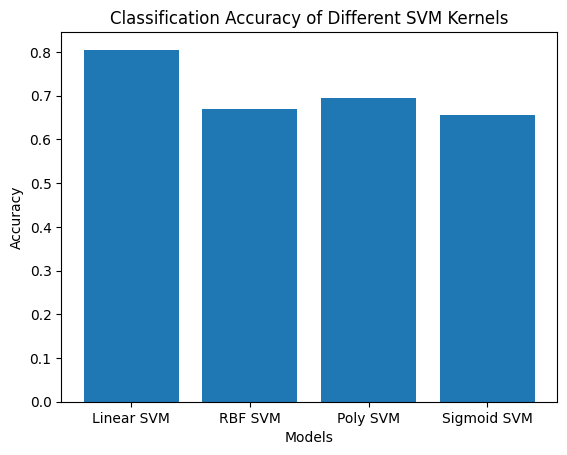

In [9]:
# прогоним наш датасет через все 4 модели, поочередно, и выведем точность для каждой из них
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_scaled, y_train)
    score = clf.score(X_test_scaled, y_test)
    scores.append(score)
    print("Model: %s, Score: %.2f%%" % (name, score * 100))

# Создаем график
plt.bar(names, scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy of Different SVM Kernels')
plt.show()


Гауссова модель показала наилучший результат, после проведения правильной - раздельной нормировки

### Задание №2

Используйте классификатор Дерева Решения для данных находящихся по ссылке. Постройте визуальную интерпретацию получившегося дерева, используя критерии
* gini
* entropy
* log_loss

In [10]:
# импортируем дополнительные библиотеки
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree

Датасет используем тот же, что и в первом задании

In [11]:
diabetes = read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
X = diabetes.iloc[:,0:-1].values
y = diabetes.Outcome.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [12]:
# подготоавливаем функцию для вывода - будем сохранять в виде файлов формата *.png
def tree_graph(tree, feature_names):
  tree_str = export_graphviz(tree,
                             feature_names=feature_names,
                             filled=True,
                             out_file=None,
                             special_characters=True,
                             rounded=True,
                             proportion=True,
                             node_ids=True,
                             precision=2,
                             impurity=True
  )
  graph = graphviz.Source(tree_str, format='png')
  return graph

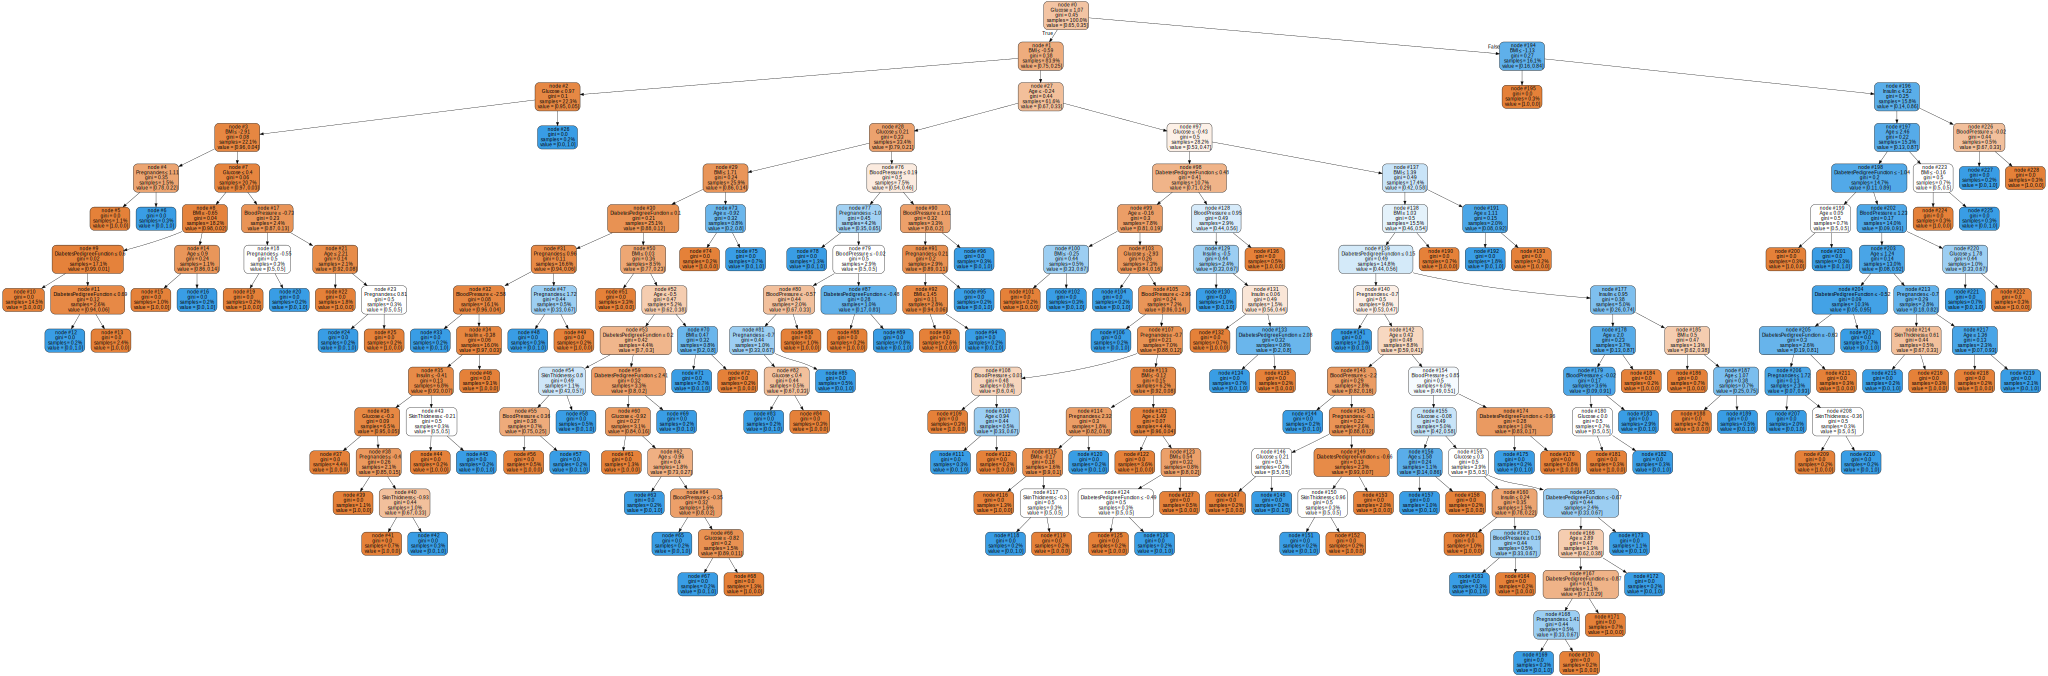

In [13]:
# обучаем классификатор используюя критерий 'gini'
dt_classifier = DecisionTreeClassifier(criterion = 'gini')

dt_classifier.fit(X_train_scaled, y_train)

tree_graph(dt_classifier, feature_names=feature_names)

In [14]:
# максимальная глубина получившегося дерева
dt_classifier.tree_.max_depth

16

In [15]:
dt_classifier.score(X_test_scaled, y_test)

0.7012987012987013

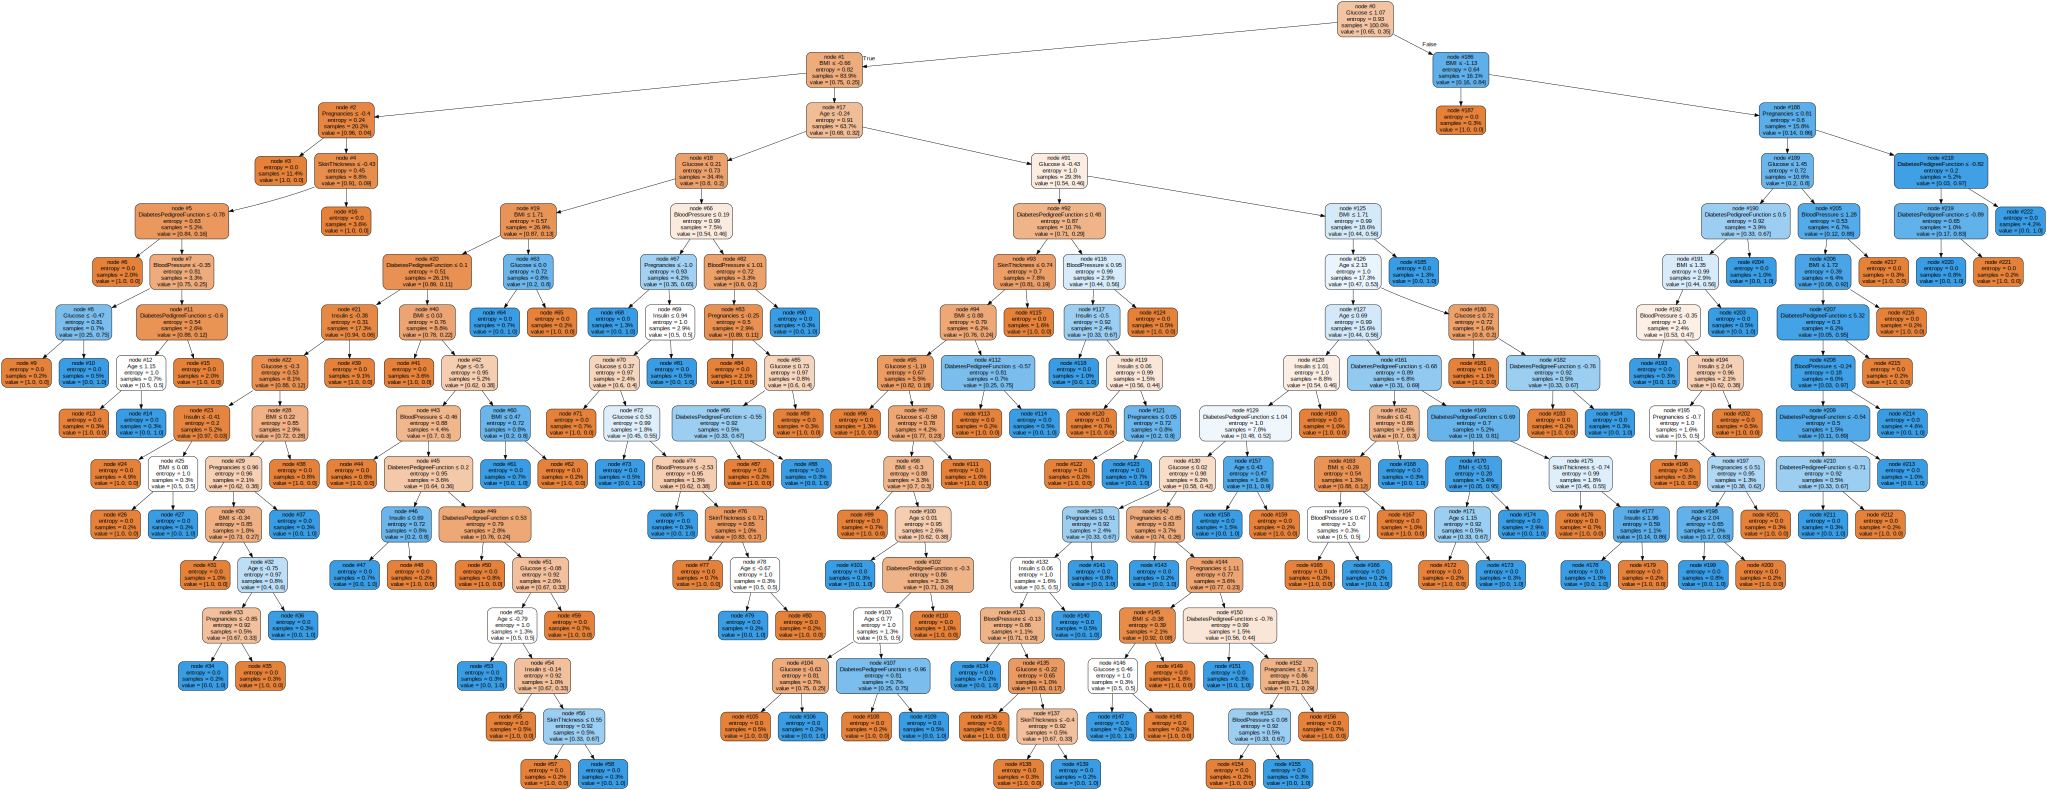

In [17]:
# обучаем классификатор используя критерий 'entropy'
dt_classifier = DecisionTreeClassifier(criterion = 'entropy')

dt_classifier.fit(X_train_scaled, y_train)

tree_graph(dt_classifier, feature_names=feature_names)

In [18]:
# максимальная глубина получившегося дерева
dt_classifier.tree_.max_depth

15

In [19]:
dt_classifier.score(X_test_scaled, y_test)

0.7467532467532467

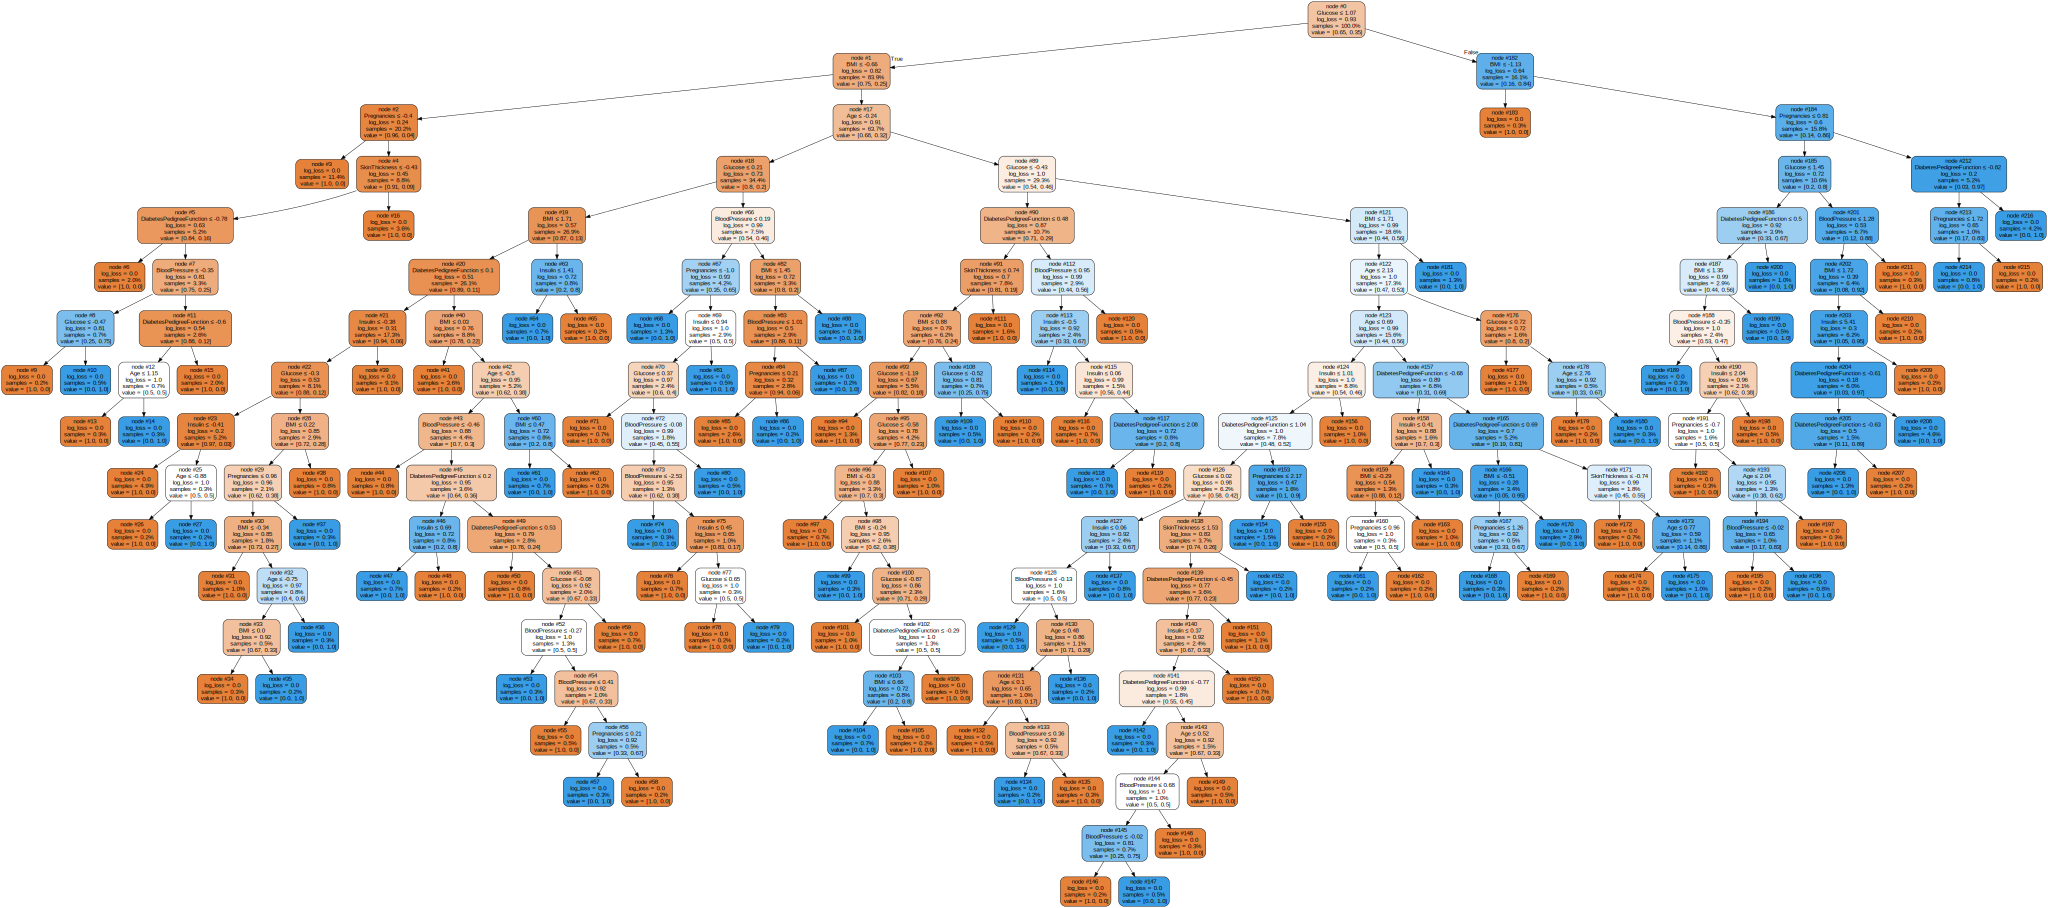

In [20]:
# обучаем классификатор используя критерий 'log_loss'
dt_classifier = DecisionTreeClassifier(criterion = 'log_loss')

dt_classifier.fit(X_train_scaled, y_train)

tree_graph(dt_classifier, feature_names=feature_names)

In [21]:
# максимальная глубина получившегося дерева
dt_classifier.tree_.max_depth

17

In [22]:
dt_classifier.score(X_test_scaled, y_test)

0.6883116883116883